In [23]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras import optimizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

In [2]:
loans = pd.read_csv('loans.csv')
loans = loans.drop(['id'], axis = 1)
loans_dropna = loans.dropna(subset = ['emplength','annualinc','delinq2yrs','inqlast6mths','openacc','revolutil','totalacc'])
loans_dropna = loans_dropna.astype({"creditpolicy":'object'})

In [3]:
loans_final = pd.get_dummies(loans_dropna, prefix = ['creditpolicy', 'term', 'grade', 'emplength', 
                   'homeownership', 'purpose', 'verificationstatus'], 
                         columns = ['creditpolicy', 'term', 'grade', 'emplength', 
                   'homeownership', 'purpose', 'verificationstatus'],
                            drop_first = 'TRUE')
loans_final.columns

Index(['loanamnt', 'intrate', 'installment', 'annualinc', 'targetloanstatus',
       'dti', 'delinq2yrs', 'inqlast6mths', 'openacc', 'revolbal', 'revolutil',
       'totalacc', 'creditpolicy_1', 'term_ 60 months', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'emplength_10+ years',
       'emplength_2 years', 'emplength_3 years', 'emplength_4 years',
       'emplength_5 years', 'emplength_6 years', 'emplength_7 years',
       'emplength_8 years', 'emplength_9 years', 'emplength_< 1 year',
       'homeownership_NONE', 'homeownership_OTHER', 'homeownership_OWN',
       'homeownership_RENT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding',
       'verificationstatus_Source Verified', 've

In [4]:
loans_final.dtypes

loanamnt                                int64
intrate                               float64
installment                           float64
annualinc                             float64
targetloanstatus                        int64
dti                                   float64
delinq2yrs                            float64
inqlast6mths                          float64
openacc                               float64
revolbal                                int64
revolutil                             float64
totalacc                              float64
creditpolicy_1                          uint8
term_ 60 months                         uint8
grade_B                                 uint8
grade_C                                 uint8
grade_D                                 uint8
grade_E                                 uint8
grade_F                                 uint8
grade_G                                 uint8
emplength_10+ years                     uint8
emplength_2 years                 

In [5]:
norm_list = ['loanamnt', 'intrate', 'installment', 'annualinc', 'targetloanstatus',
       'dti', 'delinq2yrs', 'inqlast6mths', 'openacc', 'revolbal', 'revolutil',
       'totalacc', 'creditpolicy_1', 'term_ 60 months', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'emplength_10+ years',
       'emplength_2 years', 'emplength_3 years', 'emplength_4 years',
       'emplength_5 years', 'emplength_6 years', 'emplength_7 years',
       'emplength_8 years', 'emplength_9 years', 'emplength_< 1 year',
       'homeownership_NONE', 'homeownership_OTHER', 'homeownership_OWN',
       'homeownership_RENT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding',
       'verificationstatus_Source Verified', 'verificationstatus_Verified']
new_colnames = []
loans_norm = []
loans_values = loans_final.values
col_names = list(loans_final.columns.values)

for i in range(loans_final.shape[1]):
    temp = []
    if col_names[i] in norm_list:
        temp = minmax_scale(loans_values[:,i].astype(float))
        temp = np.reshape(temp,(len(temp),1))
    else: continue
    
    new_colnames.append(col_names[i])
    if len(loans_norm) == 0:
        loans_norm = temp
    else:
        loans_norm = np.hstack([loans_norm, temp])

In [6]:
loans_norm_df = pd.DataFrame(data = loans_norm[0:,0:],
                            columns = norm_list)

In [7]:
loans_norm_df.head(4)

,loanamnt,intrate,installment,annualinc,targetloanstatus,dti,delinq2yrs,inqlast6mths,openacc,revolbal,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verificationstatus_Source Verified,verificationstatus_Verified
0,0.130435,0.272822,0.114151,0.003685,0.0,0.921974,0.0,0.030303,0.043478,0.011304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.057971,0.513824,0.034245,0.004685,1.0,0.033344,0.0,0.151515,0.043478,0.001397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.055072,0.549817,0.053245,0.001727,0.0,0.290764,0.0,0.060606,0.021739,0.002448,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.275362,0.420970,0.250977,0.007886,0.0,0.666889,0.0,0.030303,0.195652,0.004637,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
x = loans_norm_df.loc[:, loans_norm_df.columns != 'targetloanstatus']
y = loans_norm_df.loc[:, loans_norm_df.columns == 'targetloanstatus']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = x_train.columns
os_data_x, os_data_y = os.fit_sample(x_train, y_train)
os_data_x_train = pd.DataFrame(data = os_data_x, columns = columns )
os_data_y_train = pd.DataFrame(data = os_data_y, columns = ['targetloanstatus'])

print("lenth of original data is ",len(loans_norm_df))
print("length of oversampled data is ",len(os_data_x_train))
print("Number of no subscription in oversampled data",len(os_data_y_train[os_data_y_train['targetloanstatus']==0]))
print("Number of subscription",len(os_data_y_train[os_data_y_train['targetloanstatus']==1]))
print("Proportion of targetloanstatus == 0 data in oversampled data is ",len(os_data_y_train[os_data_y_train['targetloanstatus']==0])/len(os_data_x_train))
print("Proportion of targetloanstatus == 1 data in oversampled data is ",len(os_data_y_train[os_data_y_train['targetloanstatus']==1])/len(os_data_x_train))

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


lenth of original data is  41336
length of oversampled data is  49258
Number of no subscription in oversampled data 24629
Number of subscription 24629
Proportion of targetloanstatus == 0 data in oversampled data is  0.5
Proportion of targetloanstatus == 1 data in oversampled data is  0.5


In [9]:
class_weights = {0: len(os_data_y_train)/np.sum(os_data_y_train==0),
                1: len(os_data_y_train)/np.sum(os_data_y_train==1)}

print("Class weight:", class_weights)

Class weight: {0: targetloanstatus    2.0
dtype: float64, 1: targetloanstatus    2.0
dtype: float64}


In [63]:
model = Sequential()
model.add(Dense(20, input_dim = os_data_x_train.shape[1], activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.summary()
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 20)                980       
_________________________________________________________________
dense_50 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_51 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 11        
Total params: 1,311
Trainable params: 1,311
Non-trainable params: 0
_________________________________________________________________


In [98]:
from sklearn import metrics
y_predict_class = model.predict_classes(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_predict_class)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict_class)
cm = pd.DataFrame(confusion_matrix, index = ['True: 0','Ture: 1'], columns = ['Predict: 0','Predict: 1'])
print(cm)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class))

Accuracy of logistic regression classifier on test set: 0.83
         Predict: 0  Predict: 1
True: 0       10286         256
Ture: 1        1813          46
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     10542
         1.0       0.15      0.02      0.04      1859

    accuracy                           0.83     12401
   macro avg       0.50      0.50      0.48     12401
weighted avg       0.75      0.83      0.78     12401



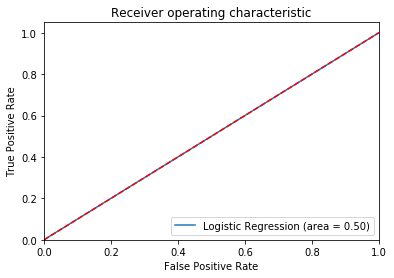

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, model.predict_classes(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_classes(x_test)[:,0])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [30]:
os_data_x_train_dropvar = os_data_x_train[['intrate',  'annualinc', 'inqlast6mths', 'revolbal', 'revolutil',
                                                    'creditpolicy_1',  
                                                    'grade_B', 'grade_C','grade_D', 'grade_E', 'grade_F', 'grade_G', 
                                                    'purpose_credit_card','purpose_debt_consolidation', 
                                                    'purpose_educational','purpose_home_improvement', 'purpose_house',
                                                    'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 
                                                    'purpose_other','purpose_renewable_energy', 
                                                    'purpose_small_business','purpose_vacation', 'purpose_wedding']]

In [34]:
x_test_dropvar = x_test[['intrate',  'annualinc', 'inqlast6mths', 'revolbal', 'revolutil',
                                                    'creditpolicy_1',  
                                                    'grade_B', 'grade_C','grade_D', 'grade_E', 'grade_F', 'grade_G', 
                                                    'purpose_credit_card','purpose_debt_consolidation', 
                                                    'purpose_educational','purpose_home_improvement', 'purpose_house',
                                                    'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 
                                                    'purpose_other','purpose_renewable_energy', 
                                                    'purpose_small_business','purpose_vacation', 'purpose_wedding']]

In [49]:
model = Sequential()
model.add(Dense(20, input_dim = os_data_x_train_dropvar.shape[1], activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.summary()
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 20)                520       
_________________________________________________________________
dense_38 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_39 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 11        
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


In [99]:
from sklearn import metrics
y_predict_class = model.predict_classes(x_test_dropvar)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_predict_class)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict_class)
cm = pd.DataFrame(confusion_matrix, index = ['True: 0','Ture: 1'], columns = ['Predict: 0','Predict: 1'])
print(cm)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class))

ValueError: Error when checking input: expected dense_49_input to have shape (48,) but got array with shape (25,)

In [51]:
print('Accuracy: ',accuracy_score(y_test, y_predict_class))
print('F1: ',f1_score(y_test, y_predict_class))
print('Recall: ',recall_score(y_test, y_predict_class))
print('Precision: ',precision_score(y_test, y_predict_class))

Accuracy:  0.8012257076042255
F1:  0.1218382614891343
Recall:  0.09198493813878429
Precision:  0.18037974683544303


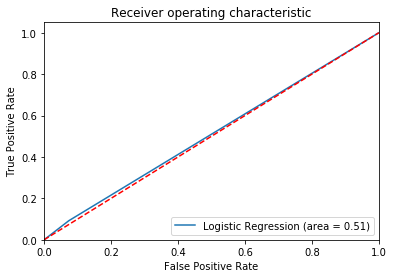

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, model.predict_classes(x_test_dropvar))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_classes(x_test_dropvar)[:,0])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()